<a href="https://colab.research.google.com/github/jimmy-io/worksheeets-/blob/master/python_stats_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting
import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
index = ['A', 'B', 'C', 'D', 'E', 'F']
data = np.random.randn(6)
data
s2 = pd.Series(data, index)
s2

A   -0.065568
B    0.727524
C    0.781043
D    2.712889
E   -0.624479
F    1.936662
dtype: float64

In [3]:
s2.cumsum() ## cummulative sum

A   -0.065568
B    0.661956
C    1.442999
D    4.155888
E    3.531408
F    5.468071
dtype: float64

In [4]:
# Series from dictionary is (of course) not ordered. Keys are used for the index.
d = {'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5}
s4 = pd.Series(d)
s4

one      1
two      2
three    3
four     4
five     5
dtype: int64

In [5]:
# looping over collection
for i, v in enumerate(s4):
    print (i, v)

0 1
1 2
2 3
3 4
4 5


In [6]:
s4b = [x**2 for x in s4]
s4b

[1, 4, 9, 16, 25]

In [8]:
# Collection of data columns
s1 = np.random.randn(5)
s2 = [True, True, False, True, False]
s3 = ['Apple', 'Banana', 'Tomato', 'Bean', 'Rice']

# Dict with added column names
data = {'Randnum': s1, 'IsBool': s2, 'Name': s3}
df = pd.DataFrame(data)
df

,Randnum,IsBool,Name
0,0.849112,True,Apple
1,-0.278470,True,Banana
2,-0.247592,False,Tomato
3,0.103345,True,Bean
4,0.006226,False,Rice


In [9]:
belowzero = df.Randnum < 0
belowzero

0    False
1     True
2     True
3    False
4    False
Name: Randnum, dtype: bool

In [10]:
isapple = df['Name'] == 'Apple'
isapple

0     True
1    False
2    False
3    False
4    False
Name: Name, dtype: bool

In [12]:
df[belowzero]

,Randnum,IsBool,Name
1,-0.278470,True,Banana
2,-0.247592,False,Tomato


In [13]:
df[belowzero | isapple]

,Randnum,IsBool,Name
0,0.849112,True,Apple
1,-0.278470,True,Banana
2,-0.247592,False,Tomato


In [14]:
# Set the index to a date range
df.index = pd.date_range('1-1-2015', periods=5, freq='d')
df.index.name = 'Date'
df

,Randnum,IsBool,Name
Date,,,
2015-01-01,0.849112,True,Apple
2015-01-02,-0.278470,True,Banana
2015-01-03,-0.247592,False,Tomato
2015-01-04,0.103345,True,Bean
2015-01-05,0.006226,False,Rice


In [15]:
# Constructing a beer sales DataFrame
df = pd.DataFrame({'Billy Beer': [13884, 23008, 17883, 24435, 49938],
                   'Lucky Lager': [34565, 83938, 59437, 28843, 48285],
                   'Triple Bock': [39987, 35512, 23542, 37729, 36647]})
df

,Billy Beer,Lucky Lager,Triple Bock
0,13884,34565,39987
1,23008,83938,35512
2,17883,59437,23542
3,24435,28843,37729
4,49938,48285,36647


In [16]:
# The same result values as using scipy stats zscore with
# a dynamic degrees of freedom of 1 
stats.zscore(df, ddof=1)

array([[-0.84628719, -0.74989281,  0.82308764],
       [-0.19989653,  1.50102567,  0.12859386],
       [-0.56297765,  0.38402339, -1.72907998],
       [-0.09880057, -1.01075918,  0.47265927],
       [ 1.70796194, -0.12439706,  0.30473921]])

In [20]:
x = np.linspace(0, 10, 500)
x[-20:]

array([ 9.61923848,  9.63927856,  9.65931864,  9.67935872,  9.6993988 ,
        9.71943888,  9.73947896,  9.75951904,  9.77955912,  9.7995992 ,
        9.81963928,  9.83967936,  9.85971944,  9.87975952,  9.8997996 ,
        9.91983968,  9.93987976,  9.95991984,  9.97995992, 10.        ])

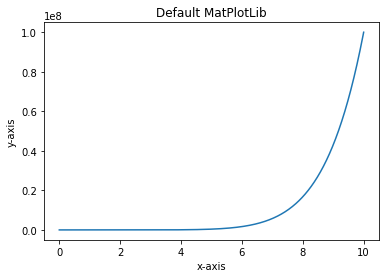

In [21]:

# Plot the default matlplotlib style
plt.title('Default MatPlotLib')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.plot(x, x**8)
plt.show()

In [4]:
# Load 248 days of step data and vivofit goals
data = pd.read_csv('/content/drive/My Drive/Insight/garmin-vivofit.csv', index_col='date')
data.head()

,steps,goal,Unnamed: 3,Unnamed: 4
date,,,,
4/25/2014,9936,4994,NaN,NaN
4/26/2014,7465,5294,NaN,NaN
4/27/2014,9437,5610,NaN,NaN
4/28/2014,8368,5946,NaN,NaN
4/29/2014,10254,6302,NaN,NaN


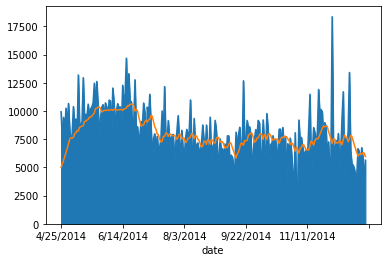

In [9]:
# Plot the steps and goal data
data['steps'].plot(kind = 'area')
data['goal'].plot()

In [11]:
data['goal'].mean()

7932.1411290322585

In [13]:
data['steps'].median()

7810.0

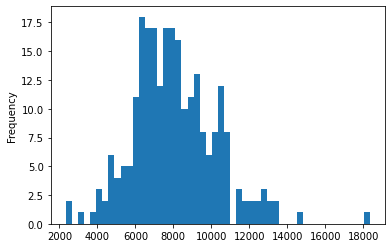

In [17]:
data['steps'].plot(kind = 'hist', bins = 50)

In [18]:
data = pd.DataFrame({'salaries': 
                     [33219, 36254, 38801, 46335, 46840, 
                      47596, 55130, 56863, 78070, 88830]})
data

,salaries
0,33219
1,36254
2,38801
3,46335
4,46840
5,47596
6,55130
7,56863
8,78070
9,88830


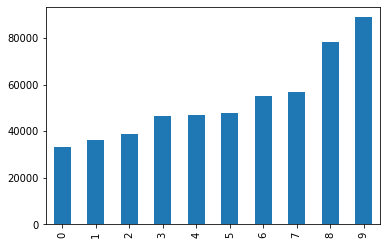

In [19]:
data['salaries'].plot(kind = 'bar')

In [21]:
data['salaries'].var(ddof = 0)

291622740.36

In [22]:
data['salaries'].var(ddof = 1)

324025267.0666667

In [23]:
data['salaries'].std(ddof = 0)

17076.965197598784

In [24]:
data['salaries'].std(ddof = 1)

18000.70184927984